In [161]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
df = pd.read_csv('Dataset.csv')
print('=====Air Quality Data=========')
print(df)
print('=====Dataset size=========')
df.shape

=====Air Quality Data=========
        T    TM    Tm     H   PP   VV    V   VM      PM_2_5
0    23.4  30.3  19.0  59.0  0.0  6.3  4.3  5.4  284.795833
1    22.4  30.3  16.9  57.0  0.0  6.9  3.3  7.6  239.695455
2    24.0  31.8  16.9  51.0  0.0  6.9  2.8  5.4  182.187500
3    22.8  30.2  17.6  55.0  0.0  7.7  3.7  7.6  264.064286
4    23.1  30.6  17.4  46.0  0.0  6.9  3.3  5.4  223.208333
..    ...   ...   ...   ...  ...  ...  ...  ...         ...
517  22.2  28.4  18.8  73.0  0.0  6.9  1.9  5.4  264.583333
518  22.2  28.8  18.3  65.0  0.0  6.9  2.4  5.4  253.291667
519  21.8  29.3  16.3  65.0  0.0  6.3  1.5  3.5  181.208333
520  21.8  28.2  18.2  67.0  0.0  6.0  2.4  5.4  210.875000
521  21.8  27.7  17.9  72.0  0.0  5.3  2.8  5.4  255.333333

[522 rows x 9 columns]
=====Dataset size=========


(522, 9)

In [162]:
X_data=df.iloc[:,:-1]
y_data=df.iloc[:,-1]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=df.dropna()
Pre_Data=scaler.fit_transform(X_data)
X = Pre_Data
y=scaler.fit_transform(np.array(y_data).reshape(-1, 1))
print('=====Data Preprocessing=========')
print(X)

=====Data Preprocessing=========
[[0.39814815 0.47101449 0.47747748 ... 0.44230769 0.33606557 0.17241379]
 [0.30555556 0.47101449 0.28828829 ... 0.55769231 0.25409836 0.28078818]
 [0.4537037  0.57971014 0.28828829 ... 0.55769231 0.21311475 0.17241379]
 ...
 [0.25       0.39855072 0.23423423 ... 0.44230769 0.10655738 0.07881773]
 [0.25       0.31884058 0.40540541 ... 0.38461538 0.18032787 0.17241379]
 [0.25       0.2826087  0.37837838 ... 0.25       0.21311475 0.17241379]]


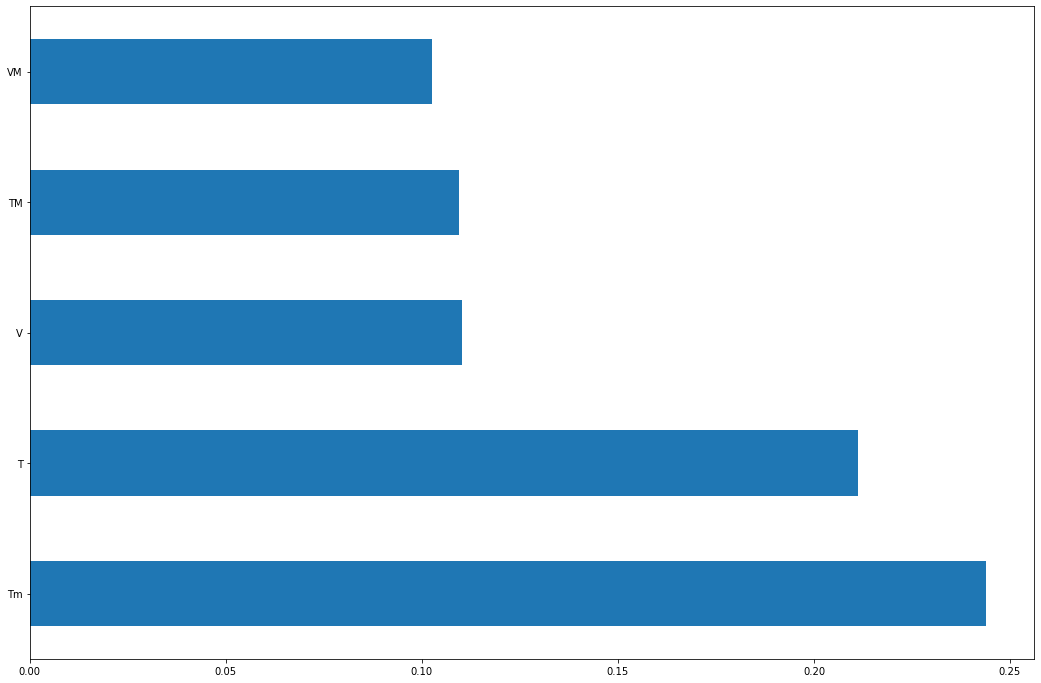

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

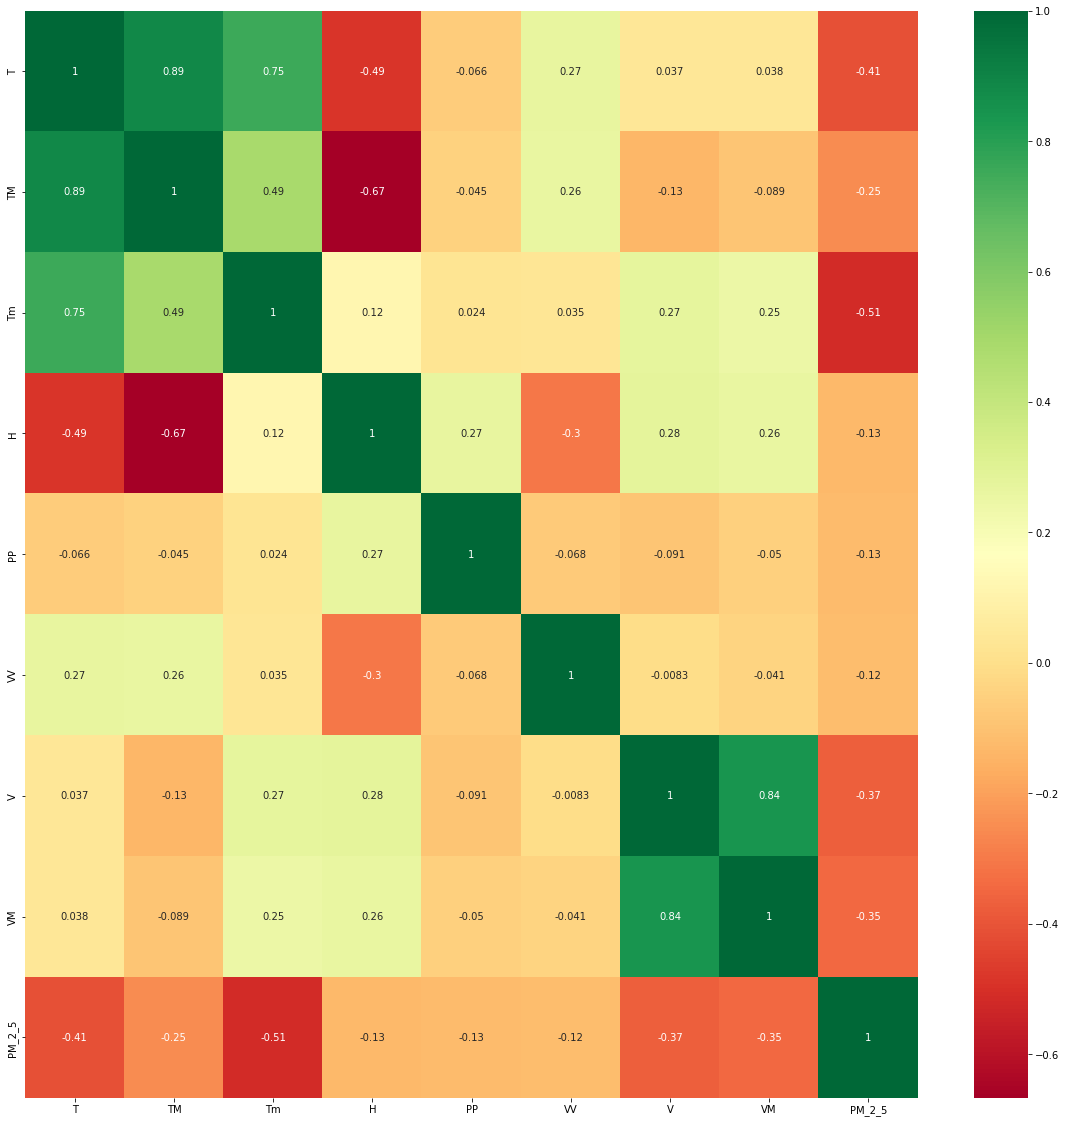

In [164]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[11:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


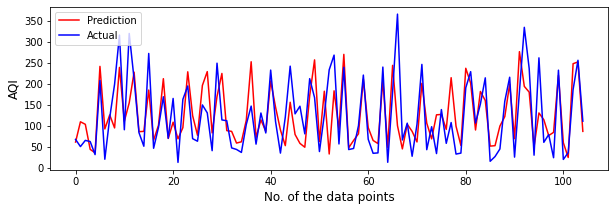

MAE: 47.13728857605965
MSE: 3971.6101429078576
RMSE: 63.020712015240335


In [165]:
import xgboost as Xgb
regressor = Xgb.XGBRegressor()
regressor.fit(X_train,y_train)
prediction=regressor.predict(X_test)
prediction1=scaler.inverse_transform(np.array(prediction).reshape(-1, 1))
y_test1=scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
plt.plot(prediction1, color='red', label='Prediction')
plt.plot(y_test1, color='blue', label='Actual')
# plt.plot(pp1)
plt.legend(loc='upper left')
# plt.title(Pred_Data)
plt.xlabel('No. of the data points', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.show()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test1, prediction1))
print('MSE:', metrics.mean_squared_error(y_test1, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, prediction1)))

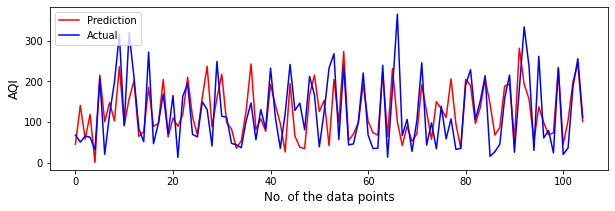

MAE: 47.79604894850887
MSE: 4155.304810811385
RMSE: 64.46165380139874


In [166]:
import xgboost as Xgb
import lightgbm as lgbm
from sklearn.ensemble import VotingRegressor
regressor1 = Xgb.XGBRegressor()
regressor2=lgbm.LGBMRegressor()
regressor2.fit(X_train,y_train)
prediction1=regressor2.predict(X_test)
prediction1=scaler.inverse_transform(np.array(prediction1).reshape(-1, 1))
y_test1=scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
plt.plot(prediction1, color='red', label='Prediction')
plt.plot(y_test1, color='blue', label='Actual')
# plt.plot(pp1)
plt.legend(loc='upper left')
# plt.title(Pred_Data)
plt.xlabel('No. of the data points', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.show()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test1, prediction1))
print('MSE:', metrics.mean_squared_error(y_test1, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, prediction1)))

[11:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


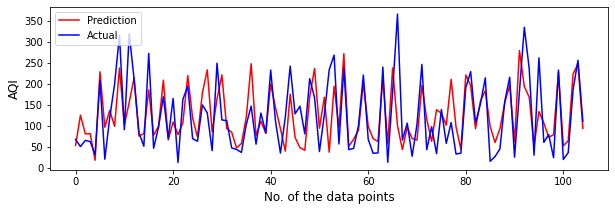

MAE: 46.37027541821553
MSE: 3913.387322801561
RMSE: 62.55707252422831


In [167]:
import xgboost as Xgb
import lightgbm as lgbm
from sklearn.ensemble import VotingRegressor
regressor1 = Xgb.XGBRegressor()
regressor2=lgbm.LGBMRegressor()
er = VotingRegressor([('xgb', regressor1), ('lgbm', regressor2)])
er.fit(X_train,y_train)
prediction1=er.predict(X_test)
prediction1=scaler.inverse_transform(np.array(prediction1).reshape(-1, 1))
y_test1=scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
plt.plot(prediction1, color='red', label='Prediction')
plt.plot(y_test1, color='blue', label='Actual')
# plt.plot(pp1)
plt.legend(loc='upper left')
# plt.title(Pred_Data)
plt.xlabel('No. of the data points', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.show()
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test1, prediction1))
print('MSE:', metrics.mean_squared_error(y_test1, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, prediction1)))